<a href="https://colab.research.google.com/github/Jordy-Rodrigues/An-lise-de-dados-2/blob/main/An%C3%A1lise_de_dados_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFICIÊNCIA DE UMA TURBINA EÓLICA

In [65]:
# IMPORTAR AS BIBLIOTECAS NECESSARIAS
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [66]:
# CARREGAR A BASE DE DADOS
data = pd.read_csv('/content/drive/MyDrive/T1.csv')
# RENOMEAR AS COLUNAS 
data.columns=['data/hora', 'potência(kW)', 'velocidade_vento(m/s)', 'curva_teórica(kwh)', 'direção_vento(°)']
# EXCLUIR DA BASE DE DADOS A COLUNA direção_vento(°)
del data['direção_vento(°)']
# CONVERTER A COLUNA data/hora DO TIPO STRING PARA TIPO DATA
data ['data/hora'] = pd.to_datetime(data['data/hora'])
# MOSTRAR O DATASET
display(data)

,data/hora,potência(kW),velocidade_vento(m/s),curva_teórica(kwh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


# VISUALIZAR EM GRÁFICOS

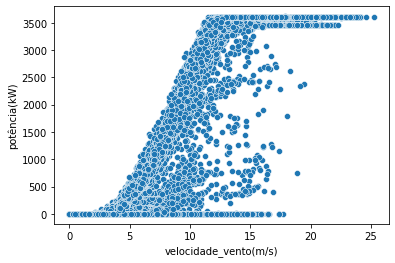

In [67]:
# GERAR GRÁFICO USANDO O SEABORN
sns.scatterplot(data = data, x = 'velocidade_vento(m/s)', y = 'potência(kW)')

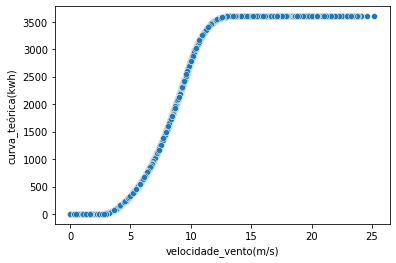

In [68]:
# VISUALIZAR NO GRÁFICO A CURVA TEÓRICA
# CURVA TEÓRICA É O MODELO DEFINIDO PELA FÁBRICA DE EFICIÊNCIA DA TURBINA PARA GERAÇÃO DE ENERGIA A PARTIR DA VELOCIDADE DO VENTO
sns.scatterplot(data = data, x = 'velocidade_vento(m/s)', y = 'curva_teórica(kwh)')

## CRIANDO LIMITES ACEITÁVEIS

In [69]:
# PEGAR A COLUNA potência(kW) E curva_teórica(kwh) E TRANSFORMAR EM LISTA
potência_real = data ['potência(kW)'].tolist()
potência_teórica = data ['curva_teórica(kwh)'].tolist()
# MOSTRAR AS 10 PRIMEIRAS LISTAS
print(potência_real[0:10])

[380.047790527343, 453.76919555664, 306.376586914062, 419.645904541015, 380.650695800781, 402.391998291015, 447.605712890625, 387.2421875, 463.651214599609, 439.725708007812]


In [70]:
# PEGAR A COLUNA potência(kW) E curva_teórica(kwh) E TRANSFORMAR EM LISTA
potência_real = data ['potência(kW)'].tolist()
potência_teórica = data ['curva_teórica(kwh)'].tolist()
# CRIAR LISTAS VAZIAS
potência_max = []
potência_min = []
dentro_limite = []

# CRIAR UMA CONDIÇÃO FOR DE REPETIÇÃO
for potência in potência_teórica:
# PARA CADA VALOR DENTRO DA CURVA TEÓRICA, VAI ADICIONAR + 5% PARA CIMA E - 5% PARA BAIXO E SALVAR ESSES VALORES AS VARIAVÉIS POTÊNCIA_MAX E POTÊNCIA_MIN
  potência_max.append(potência * 1.05)
  potência_min.append(potência * 0.95)

# DEFINIR UM LIMITE DE EFICIÊNCIA
for i, potência in enumerate(potência_real):
  if potência >= potência_min [i] and potência <= potência_max [i]:
    dentro_limite.append ('Dentro')
  elif potência ==0:
    dentro_limite.append ('Zero')
  else:
    dentro_limite.append ('Fora')

# CONTAR DE TODA A LISTA QUANTOS ESTÃO DENTRO DOS LIMITES ESTABELECIDOS
print(dentro_limite.count ('Dentro')/ len(dentro_limite))


0.37286760340391845


In [71]:
# VERIFICAR SI AS LINHAS ESTÃO IGUAIS
print(len(potência_max), len(potência_min), len(potência_teórica))

50530 50530 50530


## ADICIONAR A LISTA 'dentro_limite' AO DATAFRAME

In [72]:
# CRIAR UMA NOVA COLUNA PARA O DATAFRAME
data ['Dentro Limite'] = dentro_limite
display (data)

,data/hora,potência(kW),velocidade_vento(m/s),curva_teórica(kwh),Dentro Limite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


## RESULTADO FINAL EM GRÁFICO

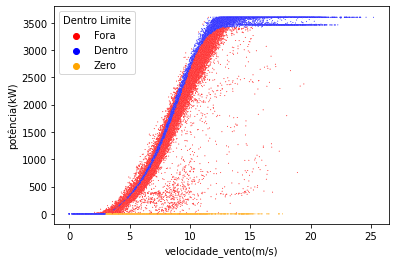

In [73]:
# CRIAR UMA VARIÁVEL PARA DEFINIR AS CORES DO GRÁFICO
cores = {'Dentro':'blue', 'Fora':'red', 'Zero':'orange'}
# COM SEABORN DEFINO O X,Y, MINHA MATIZ O TAMANHO DAS BOLINHAS E AS CORES DO GRÁFICO
sns.scatterplot(data = data, x = 'velocidade_vento(m/s)', y = 'potência(kW)', hue='Dentro Limite', s=1, palette=cores)